<a href="https://colab.research.google.com/github/luceldasilva/Movie_Analysis/blob/main/Movie_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

#**1. Configuración del Ambiente**


---




In [1]:
!pip install varname

In [2]:
from typing import Final
from varname.core import nameof
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')
global df_title_basics, df_title_ratings, df_tmdb, df_actors

Mounted at /content/drive


#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




In [3]:
TITLE_BASICS: Final = r'/content/drive/MyDrive/Colab Notebooks/ElProfeAlejo/db_raw/title.basics.tsv'
RATINGS_TITLE: Final = r'/content/drive/MyDrive/Colab Notebooks/ElProfeAlejo/db_raw/title.ratings.tsv'
TMDB_MOVIE: Final = r'/content/drive/MyDrive/Colab Notebooks/ElProfeAlejo/db_raw/TMDB_movie_dataset_v11.csv'
ACTORS_BASICS: Final = r'/content/drive/MyDrive/Colab Notebooks/ElProfeAlejo/db_raw/name.basics.tsv'

##**2.1 Cargando las bases de datos**

In [4]:
df_title_basics = dd.read_csv(
    TITLE_BASICS,
    dtype={
        'isAdult': 'object',
        'runtimeMinutes': 'object',
        'startYear': 'object'
    },
    delimiter='\t', low_memory=False
)
df_title_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [5]:
df_title_ratings = dd.read_csv(
    RATINGS_TITLE,
    delimiter='\t',
    low_memory=False
)
df_title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2023
3,tt0000004,5.30,180
4,tt0000005,6.20,2787
5,tt0000006,5.10,187
6,tt0000007,5.40,872
7,tt0000008,5.40,2202
8,tt0000009,5.40,212
9,tt0000010,6.80,7594


In [6]:
df_tmdb = dd.read_csv(TMDB_MOVIE, low_memory=False)
df_tmdb.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.64,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.57,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.93,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.71,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.08,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [7]:
%%time
titles_df_tmdb = df_tmdb[['imdb_id', 'title']].compute()
titles_df_tmdb.drop_duplicates(subset=['imdb_id'], keep='first', inplace=True)
titles_df_tmdb.reset_index(drop=True, inplace=True)
titles_df_tmdb.shape[0]

CPU times: user 18.3 s, sys: 3.45 s, total: 21.8 s
Wall time: 26 s


583249

In [8]:
titles_df_tmdb.sample(8)

,imdb_id,title
379721,tt10927840,Comment faire pour
453529,tt0152205,Robin Rodenthood
46084,tt0354243,Zhou Yu's Train
571214,tt1182978,Who Was Guilty
553278,tt8999998,Sweater
41332,tt0078224,Silver Saddle
356944,tt0405384,Tig Gibi Delikanli
45650,tt0061592,Doomsday Machine


In [9]:
df_actors = dd.read_csv(
    ACTORS_BASICS,
    dtype={'birthYear': 'object'},
    delimiter='\t',
    low_memory=False
)
df_actors.head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0036855,tt0038109,tt0038787"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,producer,miscellaneous","tt0034583,tt0042593,tt0043265,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877"
9,nm0000010,James Cagney,1899,1986,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0035575"


##**2.2 Tratamiento de Datos**

In [10]:
#@title Preprocesamiento
def preprocesamiento():
    global df_title_basics, df_title_ratings, df_tmdb, df_actors

    df_actors = df_actors.compute()
    del df_actors['deathYear']

    df_title_basics = (
        df_title_basics
        .loc[df_title_basics['titleType'].isin(['tvSeries', 'movie'])]
        .compute()
    )
    df_title_basics.drop(['endYear', 'primaryTitle'], axis=1, inplace=True)

    df_title_ratings = df_title_ratings.compute()

    for df in df_title_basics, df_title_ratings:
        df.drop_duplicates(subset=['tconst'], keep='first', inplace=True)

    list_tmdb = [
        'imdb_id', 'release_date', 'budget', 'revenue',
        'genres', 'production_countries', 'vote_average'
    ]

    df_tmdb = df_tmdb.loc[:, list_tmdb].compute()
    df_tmdb.drop_duplicates(subset=['imdb_id'], keep='first', inplace=True)

    df_tmdb = (
        df_tmdb
        .loc[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]
    )

    df_tmdb["roi"] = (
        (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']
    )

    def outliers_roi(roi=df_tmdb["roi"]):
        q1 = roi.quantile(q=0.25)
        q3 = roi.quantile(q=0.75)
        iqr = q3 - q1
        min_limit = q1 - 1.5*iqr
        max_limit = q3 + 1.5*iqr
        return min_limit, max_limit

    min_limit, max_limit = outliers_roi()

    df_tmdb = df_tmdb.loc[
        df_tmdb['roi'].between(min_limit, max_limit)
    ]

    df_tmdb['tconst'] = df_tmdb['imdb_id'].copy()
    df_tmdb = pd.merge(
        df_tmdb,
        df_title_basics[['tconst', 'startYear']],
        on='tconst', how='left'
    )
    df_tmdb['release_date'] = (
        df_tmdb['release_date']
        .fillna(df_tmdb['startYear'])
    )
    df_tmdb.drop(['tconst', 'startYear'], axis=1, inplace=True)

    for df in df_title_basics, df_title_ratings, df_tmdb, df_actors:
        df.replace('\\N', np.nan, inplace=True)
        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)

    df_tmdb['release_date'] = df_tmdb['release_date'].str[:4]
    df_tmdb['release_date'] = df_tmdb['release_date'].astype(int)
    df_tmdb['vote_average'] = df_tmdb['vote_average'].round().astype(int)

    col_integer = ['isAdult', 'startYear', 'runtimeMinutes']
    df_title_basics[col_integer] = df_title_basics[col_integer].astype(int)

    df_actors['birthYear'] = df_actors['birthYear'].astype(int)

In [11]:
%%time
preprocesamiento()
print(df_title_basics.info())
print('-------------')
print(df_title_ratings.info())
print('-------------')
print(df_tmdb.info())
print('-------------')
print(df_actors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493133 entries, 0 to 493132
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          493133 non-null  string
 1   titleType       493133 non-null  string
 2   originalTitle   493133 non-null  string
 3   isAdult         493133 non-null  int64 
 4   startYear       493133 non-null  int64 
 5   runtimeMinutes  493133 non-null  int64 
 6   genres          493133 non-null  string
dtypes: int64(3), string(4)
memory usage: 40.0 MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 40.3 MB
None
-------

In [12]:
df_tmdb.roi.sample(10)

7436    0.38
1680    0.37
3968    0.53
6214    0.47
3590   -0.26
1866    2.22
6173   -0.85
6939    1.43
1508    4.35
5817   -0.48
Name: roi, dtype: float64

In [13]:
df_title_basics.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000009,movie,Miss Jerry,0,1894,45,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
2,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
3,tt0000591,movie,L'enfant prodigue,0,1907,90,Drama
4,tt0000679,movie,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"


In [14]:
df_title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2023
3,tt0000004,5.30,180
4,tt0000005,6.20,2787


In [15]:
df_tmdb.head()

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi
0,tt1375666,2010,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8,4.16
1,tt0816692,2014,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8,3.25
2,tt0468569,2008,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",9,4.43
3,tt0848228,2012,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,8,5.90
4,tt4154756,2018,300000000,2052415039,"Adventure, Action, Science Fiction",United States of America,8,5.84


In [16]:
df_actors.head()

,nconst,primaryName,birthYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"


##**2.3 Análisis Exploratorio (EDA)**

In [17]:
def save_plot(file_name: str):
    """
        Para guardar en fotos los gráficos
    """
    plt.savefig(f"{file_name}.png", bbox_inches='tight')

In [18]:
df_title_basics.describe()

,isAdult,startYear,runtimeMinutes
count,493133.00,493133.00,493133.00
mean,0.01,1998.23,81.62
std,0.11,25.26,145.90
min,0.00,1894.00,1.00
25%,0.00,1985.00,60.00
50%,0.00,2009.00,84.00
75%,0.00,2017.00,98.00
max,1.00,2029.00,59460.00


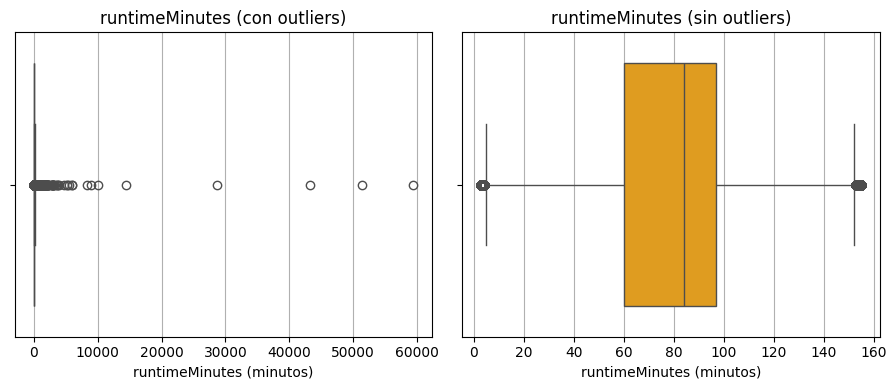

In [19]:
fig, axs = plt.subplots(1, 2 , figsize=(9, 4))

sns.boxplot(
    df_title_basics["runtimeMinutes"],
    color = "orange",
    orient = "h",
    ax = axs[0]
)
axs[0].grid(axis = "x")
axs[0].set_title("runtimeMinutes (con outliers)")
axs[0].set_xlabel("runtimeMinutes (minutos)")

runtime_minutes_df = df_title_basics.copy()

def outliers_run_minutes(run_minutes=runtime_minutes_df["runtimeMinutes"]):
    q1 = run_minutes.quantile(q=0.25)
    q3 = run_minutes.quantile(q=0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5*iqr
    max_limit = q3 + 1.5*iqr
    return min_limit, max_limit

min_limit_minutes, max_limit_minutes = outliers_run_minutes()

runtime_minutes_df = runtime_minutes_df.loc[
    runtime_minutes_df['runtimeMinutes'].between(
        min_limit_minutes, max_limit_minutes
    )
]

sns.boxplot(
    runtime_minutes_df["runtimeMinutes"],
    color = "orange",
    orient = "h",
    ax = axs[1]
)

axs[1].grid(axis = "x")
axs[1].set_title("runtimeMinutes (sin outliers)")
axs[1].set_xlabel("runtimeMinutes (minutos)")

plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
save_plot('runtimeMinutes')
plt.show()

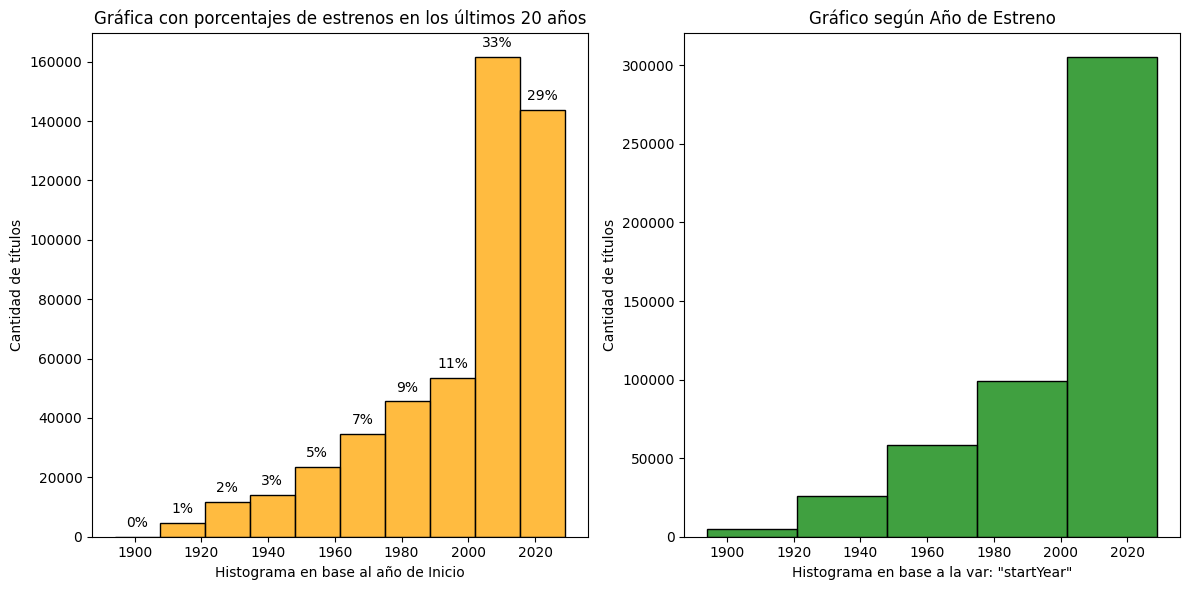

In [20]:
fig, (ex1, ex2) = plt.subplots(1, 2, figsize=(12, 6))


sns.histplot(
    data=df_title_basics, x="startYear", bins=10, ax=ex1, color="orange"
)
ex1.set_title("Gráfica con porcentajes de estrenos en los últimos 20 años")
ex1.set_xlabel("Histograma en base al año de Inicio")
ex1.set_ylabel("Cantidad de títulos")

total = len(df_title_basics)
for p in ex1.patches:
    count = p.get_height()
    percentage = f"{count / total:.0%}"
    ex1.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )

sns.histplot(data=df_title_basics, x="startYear", bins=5, ax=ex2, color="green")
ex2.set_title("Gráfico según Año de Estreno")
ex2.set_xlabel('Histograma en base a la var: "startYear"')
ex2.set_ylabel("Cantidad de títulos")

plt.tight_layout()
save_plot("startYear")
plt.show()

In [21]:
df_title_ratings.describe()

,averageRating,numVotes
count,1446041.00,1446041.00
mean,6.96,1032.07
std,1.38,17697.86
min,1.00,5.00
25%,6.20,11.00
50%,7.20,26.00
75%,7.90,101.00
max,10.00,2904305.00


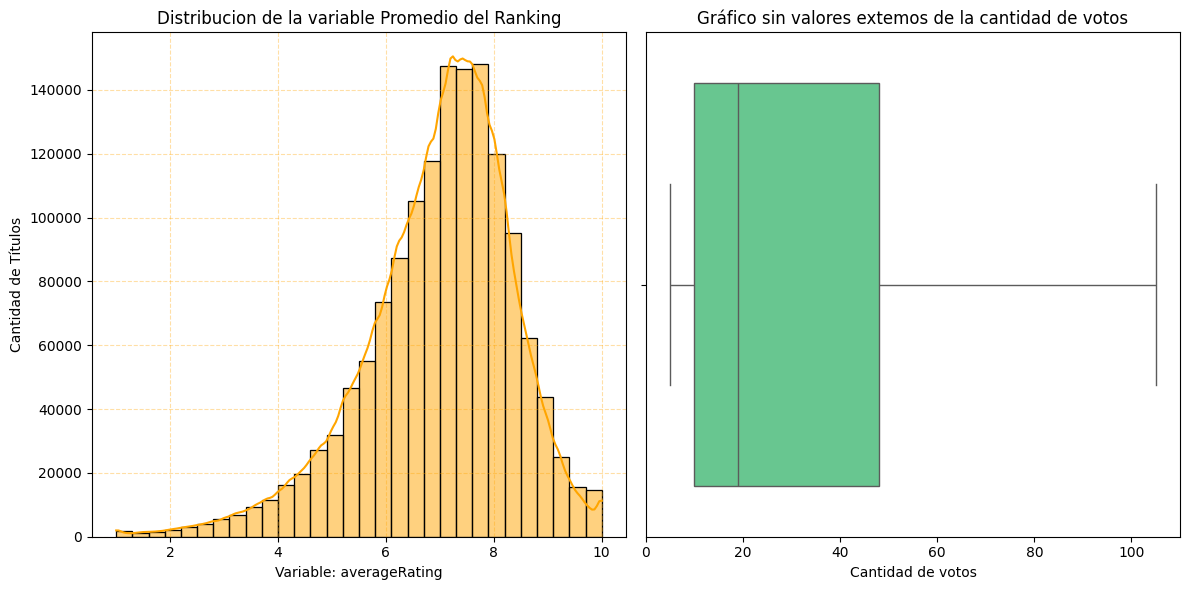

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(
    data=df_title_ratings,
    x="averageRating",
    bins=30,
    kde=True,
    ax=ax1,
    color="orange",
)
ax1.grid(color="orange", linestyle="dashed", alpha=0.35)
ax1.set_title("Distribucion de la variable Promedio del Ranking")
ax1.set_xlabel("Variable: averageRating")
ax1.set_ylabel("Cantidad de Títulos")

q1 = df_title_ratings["numVotes"].quantile(0.25)
q3 = df_title_ratings["numVotes"].quantile(0.75)
iqr = q3 - q1
bound_menor = q1 - 1.5 * iqr
bound_superior = q3 + 1.5 * iqr

df_iqr_outliers = df_title_ratings[
    (df_title_ratings["numVotes"] >= bound_menor)
    & (df_title_ratings["numVotes"] <= bound_superior)
]

plt.subplot(1, 2, 2)
sns.boxplot(x=df_iqr_outliers["numVotes"], showfliers=False, color="#58D68D")
plt.title("Gráfico sin valores extemos de la cantidad de votos")
plt.xlabel("Cantidad de votos")

plt.tight_layout()
save_plot("averageRating_numVotes")
plt.show()

In [23]:
df_tmdb.describe()

,release_date,budget,revenue,vote_average,roi
count,9149.00,9149.00,9149.00,9149.00,9149.00
mean,2001.62,24874725.28,59057943.06,6.15,1.05
std,18.49,38877105.74,140709801.84,1.63,1.91
min,1914.00,1.00,1.00,0.00,-1.00
25%,1995.00,2500000.00,1485000.00,6.00,-0.42
50%,2007.00,10000000.00,11100000.00,6.00,0.49
75%,2014.00,30000000.00,50100000.00,7.00,1.98
max,2024.00,460000000.00,2800000000.00,10.00,7.48


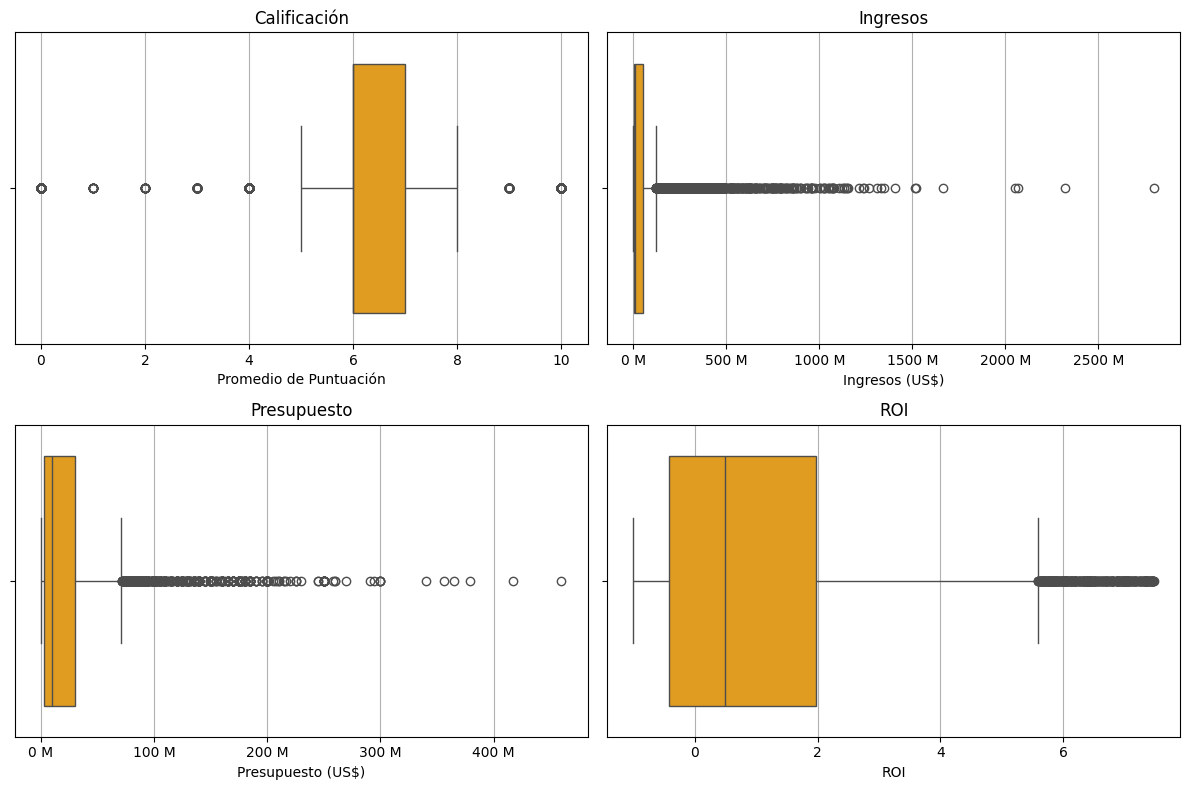

In [24]:
def millions_formatter(x, pos):
    return f'{x:.0f} M'

fig, axs = plt.subplots(2, 2 , figsize=(12, 8))

# vote_average
sns.boxplot(
    df_tmdb["vote_average"], ax=axs[0, 0],
    color = "orange", orient = "h")
axs[0, 0].grid(axis = "x")
axs[0, 0].set_title("Calificación")
axs[0, 0].set_xlabel("Promedio de Puntuación")

# revenue
sns.boxplot(df_tmdb["revenue"] / 1e6, ax=axs[0, 1],
    color = "orange", orient = "h")
axs[0, 1].xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
axs[0, 1].grid(axis = "x")
axs[0, 1].set_title("Ingresos")
axs[0, 1].set_xlabel("Ingresos (US$)")

# budget
sns.boxplot(df_tmdb["budget"] / 1e6, ax=axs[1, 0],
    color = "orange", orient = "h")
axs[1, 0].grid(axis = "x")
axs[1, 0].set_title("Presupuesto")
axs[1, 0].set_xlabel("Presupuesto (US$)")
axs[1, 0].xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# ROI
sns.boxplot(df_tmdb["roi"], ax=axs[1, 1],
    color = "orange", orient = "h")
axs[1, 1].grid(axis = "x")
axs[1, 1].set_title("ROI")
axs[1, 1].set_xlabel("ROI")

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
save_plot('calificacion_ingresos_presupuesto_roi')
plt.show()

In [25]:
#@title Filtrado
df_title_basics = (
    df_title_basics[
        [
            'tconst', 'titleType', 'originalTitle',
            'startYear', 'runtimeMinutes', 'genres'
        ]])
df_title_basics = (
    df_title_basics[
        (df_title_basics.startYear.between(1990, 2024))
        & (df_title_basics.runtimeMinutes.between(15, 180))
    ]
)
df_title_ratings = (
    df_title_ratings[
        (df_title_ratings.numVotes > 1000)
        & (df_title_ratings.averageRating > 0)
    ]
)
df_tmdb = df_tmdb[df_tmdb['release_date'].between(1998, 2024)]
df_tmdb = df_tmdb[(df_tmdb.budget>500000) & (df_tmdb.revenue>500000)]

In [26]:
def actors_with_movies() -> pd.DataFrame:
    """
    Genera un DataFrame que relaciona actores con los géneros de
    las películas en las que han trabajado, combinando datos `df_tmdb`
    y `df_title_basics`.

    Returns
    -------
    pd.DataFrame
        Un DataFrame que contiene las siguientes columnas:
        - Catalogue_ID: Identificador de la película/serie en el catálogo.
        - Actor: Nombre del actor.
        - genres: Géneros combinados de la película/serie.
    """

    global df_actors, df_tmdb, df_title_basics

    df_actors["catalogue"] = df_actors["knownForTitles"].apply(
        lambda x: x.split(",")
    )

    catalogue = []
    actors = []

    for index, row in df_actors.iterrows():
        for catalogue_id in row["catalogue"]:
            catalogue.append(catalogue_id)
            actors.append(row["primaryName"])

    catalogue_df = pd.DataFrame({"Catalogue_ID": catalogue, "Actor": actors})
    catalogue_tmdb_df = pd.merge(
        catalogue_df,
        df_tmdb,
        how="left",
        left_on="Catalogue_ID",
        right_on="imdb_id",
    )
    catalogue_tmdb_df = catalogue_tmdb_df[["Catalogue_ID", "Actor", "genres"]]
    catalogue_tmdb_df = catalogue_tmdb_df.rename(
        columns={"genres": "genres_tmdb"}
    )
    catalogue_tmdb_title_basics_df = pd.merge(
        catalogue_tmdb_df,
        df_title_basics,
        how="left",
        left_on="Catalogue_ID",
        right_on="tconst",
    )
    catalogue_tmdb_title_basics_df = catalogue_tmdb_title_basics_df[
        ["Catalogue_ID", "Actor", "genres_tmdb", "genres"]
    ]
    catalogue_tmdb_title_basics_df = catalogue_tmdb_title_basics_df.rename(
        columns={"genres": "genres_title_basics"}
    )
    catalogue_tmdb_title_basics_df.reset_index(drop=True, inplace=True)

    def union_genres(row):
        value_tmdb = (
            set(str(row["genres_tmdb"]).split(","))
            if pd.notnull(row["genres_tmdb"])
            else set()
        )
        value_title_basic = (
            set(str(row["genres_title_basics"]).split(","))
            if pd.notnull(row["genres_title_basics"])
            else set()
        )
        union_tmdb_title_basics = value_tmdb.union(value_title_basic) - {
            np.nan,
            "",
        }
        return ", ".join(union_tmdb_title_basics)

    def drop_duplicates_genres(val):
        genres = [genre.strip() for genre in val.split(",")]
        genres_unique = list(dict.fromkeys(genres))
        return ", ".join(genres_unique)

    catalogue_tmdb_title_basics_df["genres"] = (
        catalogue_tmdb_title_basics_df.apply(union_genres, axis=1)
    )
    catalogue_tmdb_title_basics_df.drop(
        ["genres_tmdb", "genres_title_basics"], axis=1, inplace=True
    )
    catalogue_tmdb_title_basics_df["genres"] = catalogue_tmdb_title_basics_df[
        "genres"
    ].apply(drop_duplicates_genres)
    catalogue_tmdb_title_basics_df.drop(
        catalogue_tmdb_title_basics_df[
            (catalogue_tmdb_title_basics_df["genres"] == "")
        ].index,
        inplace=True,
    )
    catalogue_tmdb_title_basics_df.reset_index(drop=True, inplace=True)
    return catalogue_tmdb_title_basics_df

In [27]:
%%time
actors_in_tvSeries_movies_df = actors_with_movies()

CPU times: user 1min 15s, sys: 1.07 s, total: 1min 16s
Wall time: 1min 17s


In [28]:
actors_in_tvSeries_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747498 entries, 0 to 747497
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Catalogue_ID  747498 non-null  object
 1   Actor         747498 non-null  object
 2   genres        747498 non-null  object
dtypes: object(3)
memory usage: 17.1+ MB


In [29]:
actors_in_tvSeries_movies_df.sample(8)

,Catalogue_ID,Actor,genres
672401,tt9471962,Aysegul Ciftci,"Action, Drama, Crime"
226413,tt0289848,Kyle Sabihy,"Comedy, Crime"
39120,tt0903597,Ahmed Boulane,Drama
60403,tt0212346,Dyan Conner,"Comedy, Action, Crime"
93914,tt0109994,Franz Froschauer,"Drama, War"
6790,tt1670345,Jonathan Levit,"Thriller, Mystery, Crime"
412383,tt1316554,Hisayoshi Suganuma,"Action, Comedy, Animation"
325927,tt0408396,Joel Osteen,Talk-Show


#**3. Preguntas y respuestas**


---




##**Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

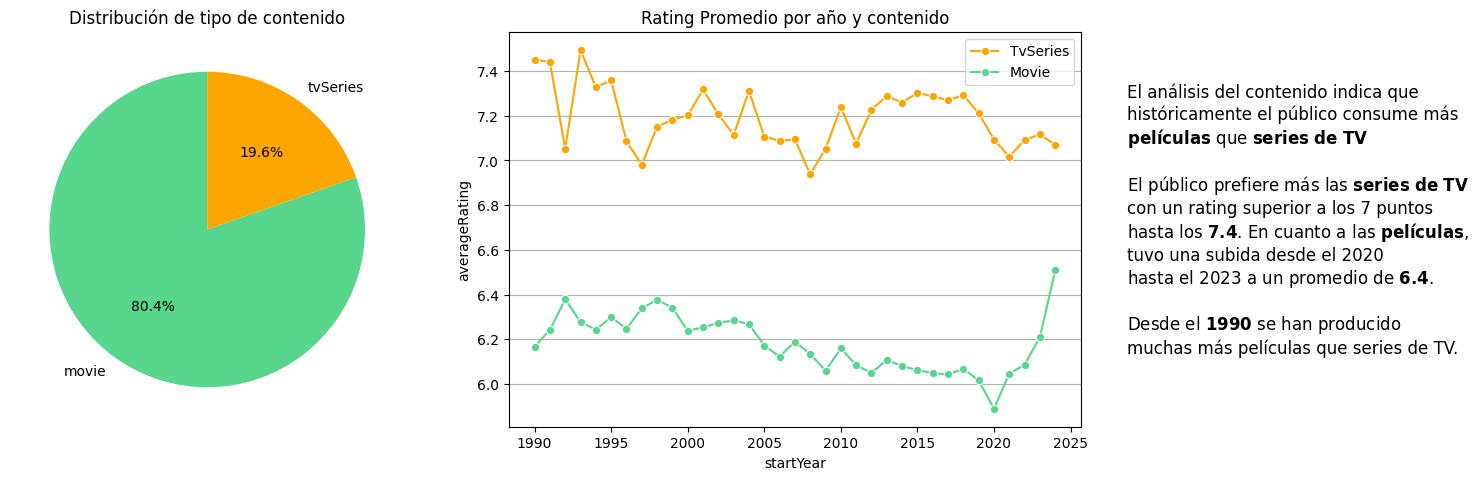

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

title_type_counts = df_title_basics["titleType"].value_counts()

axs[0, 0].pie(
    title_type_counts,
    labels=title_type_counts.index,
    colors=["#58D68D", "orange"],
    autopct="%1.1f%%",
    startangle=90,
)
axs[0, 0].set_title("Distribución de tipo de contenido")

subset_serie = df_title_basics[df_title_basics["titleType"] == "tvSeries"]

avg_rating_by_year_serie = (
    subset_serie.merge(df_title_ratings, on="tconst")
    .groupby("startYear")["averageRating"]
    .mean()
)

subset_movie = df_title_basics[df_title_basics["titleType"] == "movie"]

avg_rating_by_year_movie = (
    subset_movie.merge(df_title_ratings, on="tconst")
    .groupby("startYear")["averageRating"]
    .mean()
)

sns.lineplot(
    data=avg_rating_by_year_serie,
    marker="o",
    ax=axs[0, 1],
    color="orange",
    label="TvSeries",
)
sns.lineplot(
    data=avg_rating_by_year_movie,
    marker="o",
    ax=axs[0, 1],
    color="#58D68D",
    label="Movie",
)
axs[0, 1].set_title("Rating Promedio por año y contenido")
axs[0, 1].grid(axis="y")
axs[0, 1].legend()

axs[1, 0].remove()
axs[1, 1].remove()

fig.text(
    1,
    0.555,
    r"""
    El análisis del contenido indica que
    históricamente el público consume más
    $\mathbf{películas}$ que $\mathbf{series}$ $\mathbf{de}$ $\mathbf{TV}$

    El público prefiere más las $\mathbf{series}$ $\mathbf{de}$ $\mathbf{TV}$
    con un rating superior a los 7 puntos
    hasta los $\mathbf{7.4}$. En cuanto a las $\mathbf{películas}$,
    tuvo una subida desde el 2020
    hasta el 2023 a un promedio de $\mathbf{6.4}$.

    Desde el $\mathbf{1990}$ se han producido
    muchas más películas que series de TV.

    """,
    ha="left",
    fontsize=12,
)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

save_plot("insight_1")

plt.show()

##**Pregunta 2: ¿Cual es el rating promedio por género?**

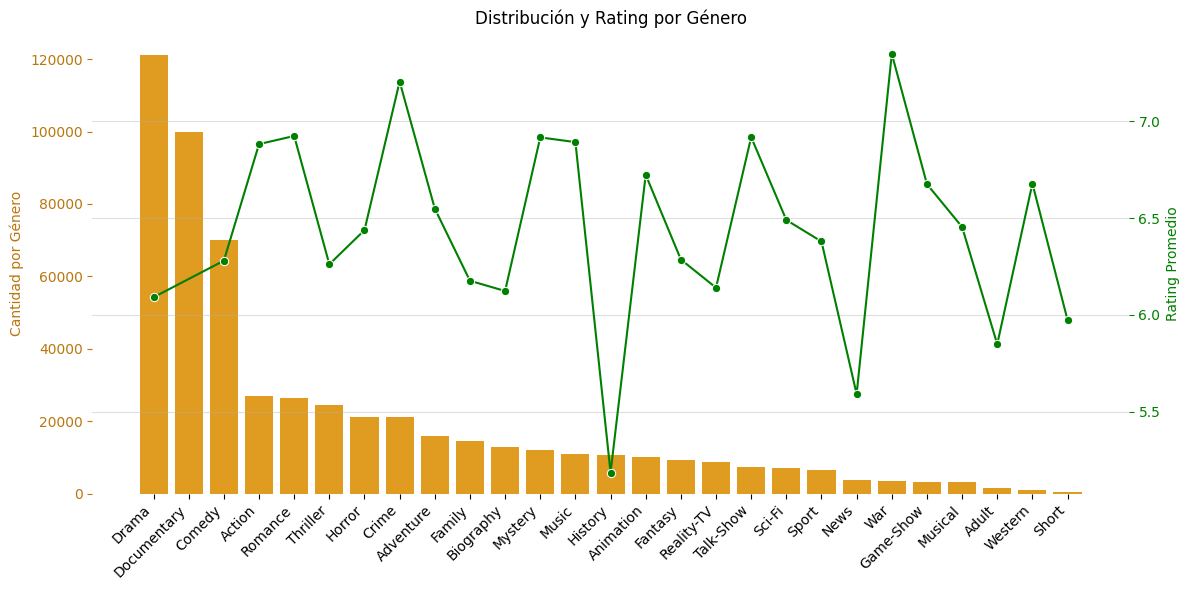

In [31]:
df_title_basics_copy = pd.merge(
    df_title_basics, df_title_ratings, on="tconst", how="left"
)

df_title_basics_expanded = df_title_basics_copy.assign(
    genre=df_title_basics_copy["genres"].str.split(",")
).explode("genre")

agg_dict = {"averageRating": "mean", "tconst": "count"}
df_genre_stats = (
    df_title_basics_expanded.groupby("genre").agg(agg_dict).reset_index()
)
genre_order = df_title_basics_expanded["genre"].value_counts().index


fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico de barras
sns.countplot(
    data=df_title_basics_expanded,
    x="genre",
    ax=ax1,
    order=genre_order,
    color="orange",
)
ax1.set_title("Distribución y Rating por Género")
ax1.set_xlabel("")
ax1.set_ylabel(
    "Cantidad por Género", color="#B9770E"
)
ax1.tick_params(
    axis="y", colors="#B9770E"
)

for spine in ax1.spines.values():
    spine.set_visible(False)


ax1.set_xticks(range(len(genre_order)))
ax1.set_xticklabels(
    genre_order, rotation=45, ha="right"
)

ax2 = ax1.twinx()

sns.lineplot(
    data=df_genre_stats,
    x="genre",
    y="averageRating",
    ax=ax2,
    color="g",
    marker="o",
)
ax2.set_ylabel(
    "Rating Promedio", color="green"
)
for spine in ax2.spines.values():
    spine.set_visible(False)

ax2.set_xlabel(None)
ax2.tick_params(axis="y", colors="green")
ax2.grid(axis="y", alpha=0.4)

plt.tight_layout()
save_plot("insight_2")
plt.show()

Se ve que hay más cantidad de obras con los géneros **Drama**, **Documentales** y **Comedia** y mantienen promedio **que no supera 6.5** puntos, sin embargo hay géneros que tienen **menos de 25000** de obras hay con puntaje **mayor a 7**, como ejemplo ponemos al género _**Crímenes**_.

##**Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?**

In [32]:
categories_basics = df_title_basics['genres'].str.split(',')
basics_category_counts = categories_basics.explode().value_counts()
basics_category_counts

genres
Drama          121204
Documentary     99825
Comedy          69929
Action          27011
Romance         26519
Thriller        24589
Horror          21059
Crime           21040
Adventure       15783
Family          14391
Biography       12825
Mystery         12001
Music           10792
History         10649
Animation       10019
Fantasy          9363
Reality-TV       8600
Talk-Show        7280
Sci-Fi           7182
Sport            6587
News             3763
War              3404
Game-Show        3250
Musical          3156
Adult            1540
Western           942
Short             421
Name: count, dtype: int64

In [33]:
categories_tmdb = df_tmdb['genres'].str.split(', ')
tmdb_category_counts = categories_tmdb.explode().value_counts()
tmdb_category_counts

genres
Drama              2402
Comedy             1913
Action             1462
Thriller           1312
Adventure           994
Romance             948
Crime               791
Family              619
Fantasy             561
Science Fiction     529
Horror              487
Mystery             434
Animation           373
History             303
War                 182
Music               146
Western              50
Documentary          47
TV Movie              6
Name: count, dtype: int64

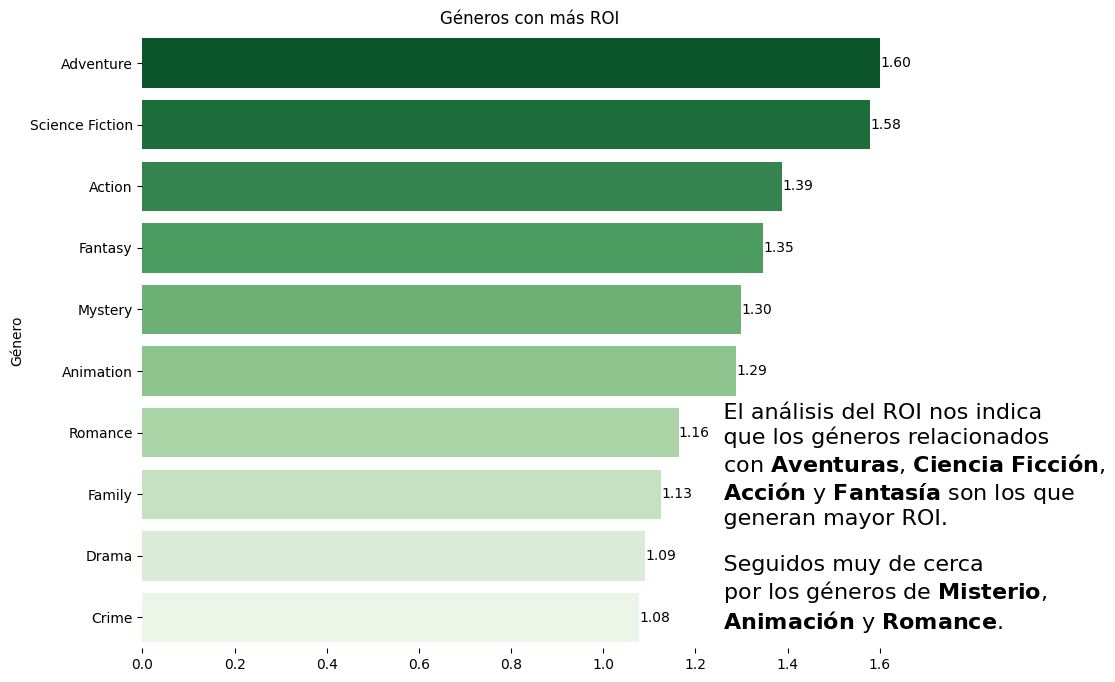

In [34]:
# @title
def insight_3_genre_roi() -> pd.Series:
    global tmdb_category_counts

    df_genre_count = tmdb_category_counts[tmdb_category_counts < 200]
    df_tmdb_expanded = df_tmdb.assign(
        genre=df_tmdb["genres"].str.split(",").explode("genre").str.strip()
    ).explode("genre")
    df_tmdb_expanded = df_tmdb_expanded[
        ~df_tmdb_expanded["genre"].isin(df_genre_count.index.to_list())
    ]
    df_genre_roi = (
        df_tmdb_expanded.groupby("genre")["roi"]
        .mean()
        .sort_values(ascending=False)
        .iloc[:10]
    )
    return df_genre_roi

df_genre_roi = insight_3_genre_roi()

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    x=df_genre_roi.values,
    y=df_genre_roi.index,
    palette='Greens_r',
    ax=ax,
    hue=df_genre_roi.index
    )

for i, value in enumerate(df_genre_roi.values):
    ax.text(value, i, f'{value:.2f}', va='center')


ax.text(
    1.2,
    9.6,
    """
    El análisis del ROI nos indica
    que los géneros relacionados
    con $\\bf{Aventuras}$, $\\bf{Ciencia}$ $\\bf{Ficción}$,
    $\\bf{Acción}$ y $\\bf{Fantasía}$ son los que
    generan mayor ROI.\n
    Seguidos muy de cerca
    por los géneros de $\\bf{Misterio}$,
    $\\bf{Animación}$ y $\\bf{Romance}$.
    """,
    fontsize=16,
)

ax.set_title("Géneros con más ROI")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylabel("Género")

save_plot('insight_3')
plt.show()

### Trayendo películas que tengan alguna de esos géneros

In [35]:
pattern = '|'.join((df_genre_roi.index))

In [36]:
tmdb_movies_genre_common = df_tmdb[
    df_tmdb["genres"].str.contains(pattern, case=False, regex=True)
].query("release_date > 2022")

tmdb_movies_genre_common = pd.merge(
    tmdb_movies_genre_common[
        ["imdb_id", "release_date", "roi", "vote_average", "genres"]
    ],
    titles_df_tmdb,
    on="imdb_id",
    how="left",
)
tmdb_movies_genre_common.to_csv(
    f"{nameof(tmdb_movies_genre_common)}.csv", index=False
)
tmdb_movies_genre_common.sample(4)

,imdb_id,release_date,roi,vote_average,genres,title
71,tt26693652,2023,0.57,7,"Comedy, Drama",Invalid
29,tt10855768,2023,5.44,8,"Thriller, Mystery",Missing
7,tt15789038,2023,1.43,8,"Animation, Comedy, Family, Fantasy, Romance",Elemental
1,tt10366206,2023,3.74,8,"Action, Thriller, Crime",John Wick: Chapter 4


##**Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

In [37]:
def insight_4_produccion() -> pd.DataFrame:
    df_tmdb_exploded_countries = (
        df_tmdb.assign(
            production_countries=df_tmdb["production_countries"].str.split(",")
        )
        .explode("production_countries")
        .copy()
    )
    df_tmdb_exploded_countries["production_countries"] = (
        df_tmdb_exploded_countries["production_countries"].str.strip()
    )
    df_plot = df_tmdb_exploded_countries.groupby("production_countries").agg(
        {"roi": "mean", "production_countries": "count"}
    )
    df_plot.rename(columns={"production_countries": "count"}, inplace=True)
    df_plot = df_plot.sort_values(by=["count"])
    df_plot = df_plot.iloc[-13:]
    num_countries = len(df_plot)
    grid_size = int(np.ceil(np.sqrt(num_countries)))
    df_plot["x"] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
    df_plot["y"] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]
    return df_plot

In [38]:
df_plot = insight_4_produccion()
df_plot

,roi,count,x,y
production_countries,,,,
Australia,1.04,110,0,0
Belgium,0.20,117,1,0
Japan,1.25,133,2,0
Italy,0.40,136,3,0
China,1.26,147,0,1
Russia,0.80,151,1,1
Spain,0.81,162,2,1
Canada,0.91,331,3,1
Germany,0.79,400,0,2


In [39]:
#@title Países con mayor producción de contenido
import plotly.express as px


fig = px.scatter(
    df_plot, x='x', y='y',
    size='count', color='roi',
    text=df_plot.index,
    color_continuous_scale='oranges',
    size_max=110,
    custom_data=['roi'],
    hover_data={
        'roi': True, 'count': False,
        'x': False, 'y': False
    }
)

fig.update_traces(hovertemplate='%{text}<br>ROI: %{customdata[0]:.2f}')

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False, zeroline=False, showticklabels=False, title=''
    ),
    yaxis=dict(
        showgrid=False, zeroline=False, showticklabels=False, title=''
    ),
    title={
        'text': 'Países con mayor producción de contenido',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    width=750,
    height=650
)

fig.write_html("insight_4.html")
fig.show()

El país con la mayor producción de contenidos es USA, en dinero y en cantidad.
Como sugerencia al negocio proponemos seguir adquiriendo y sumando a la plataforma series y peliculas de esos tres paises, en un 75% USA, el porcentaje restante nos repartimos entre dos países de la lista en los géneros de ciencia ficción, acción y aventuras mayoritariamente.

## **Pregunta 5. Series de TV más vistos**
A partir de esta consigna estudiamos las series que se vieron más vistas con la cantidad de votos que tienen.

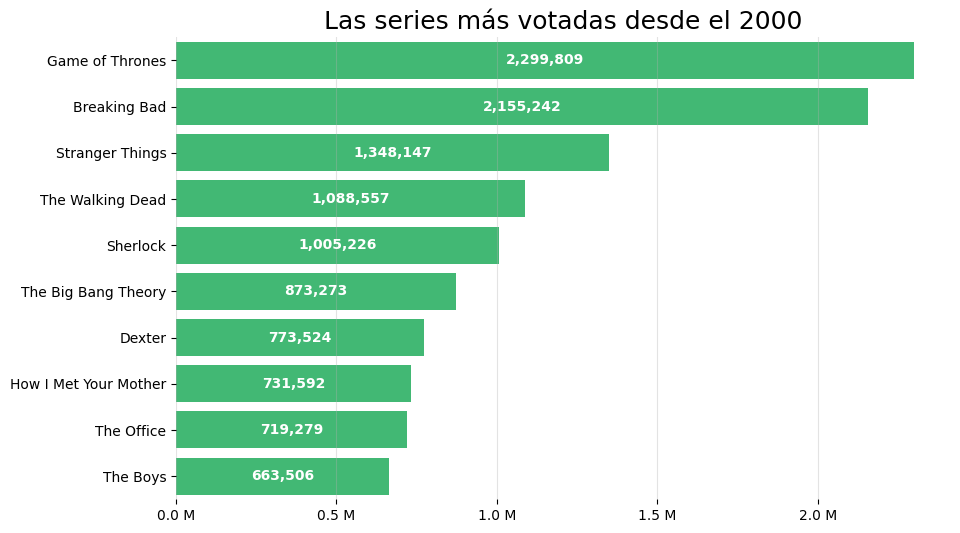

In [40]:
def mm_formatter(x, pos):
    return f"{(x / 1e6):.1f} M"


df_title_basics_resumen = pd.merge(
    df_title_basics, df_title_ratings, on="tconst", how="left"
)

df_title_basics_tvSeries = df_title_basics_resumen[
    df_title_basics_resumen["titleType"] == "tvSeries"
]

df_title_basics_tvSeries = df_title_basics_tvSeries.query("startYear > 1999")

df_title_basics_tvSeries = df_title_basics_tvSeries.sort_values(
    by="numVotes", ascending=False
)

top_10_tvSeries = df_title_basics_tvSeries.iloc[:10]


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="numVotes",
    y="originalTitle",
    data=top_10_tvSeries,
    palette=["#2ECC71"],
    hue="originalTitle",
)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(mm_formatter))
ax.grid(axis="x", alpha=0.35)

plt.xlabel("")
plt.ylabel("")
plt.title("Las series más votadas desde el 2000", fontsize=18)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width / 2,
        p.get_y() + p.get_height() / 2,
        "{:,.0f}".format(width),
        ha="center",
        va="center",
        color="white",
        fontsize=10,
        weight="bold",
    )

sns.despine(trim=True, top=True, bottom=True, right=True, left=True)
save_plot("insight_5")
plt.show()

In [41]:
%%time
# @title Mostrar géneros de las series
def gen_tvSeries() -> pd.DataFrame:
    """
    Genera un DataFrame con información específica
    del top 10 de de las series de TV.

    Returns
    -------
    pd.DataFrame
        Un DataFrame que contiene las siguientes columnas:
        - Title: Título de la serie, incluyendo la temporada si aplica.
        - startYear: Año de inicio de la serie/temporada.
        - genres: Géneros de la serie.
        - averageRating: Rating promedio de la temporada de la serie.
        - numVotes: Número de votos recibidos.
    """

    global df_title_basics_tvSeries, top_10_tvSeries

    df_gen_tvSeries = df_title_basics_tvSeries[
        df_title_basics_tvSeries["originalTitle"].isin(
            top_10_tvSeries["originalTitle"].to_list()
        )
    ]
    df_gen_tvSeries = df_gen_tvSeries.sort_values(
        by=["originalTitle", "startYear"]
    )
    df_gen_tvSeries["Temporada"] = 0

    grupos = df_gen_tvSeries.groupby("originalTitle")

    for titulo, grupo in grupos:
        if len(grupo) > 1:
            df_gen_tvSeries.loc[grupo.index, "Temporada"] = range(
                1, len(grupo) + 1
            )
        else:
            df_gen_tvSeries.loc[grupo.index, "Temporada"] = None

    def modificar_titulo(row):
        if pd.notna(row["Temporada"]):
            return f"{row['originalTitle']} Temp. {int(row['Temporada'])}"
        else:
            return row["originalTitle"]

    df_gen_tvSeries["Title"] = df_gen_tvSeries.apply(modificar_titulo, axis=1)
    df_gen_tvSeries = df_gen_tvSeries.query("startYear > 1999")
    df_gen_tvSeries.dropna(
        subset=["genres", "averageRating", "numVotes"], inplace=True
    )
    df_gen_tvSeries = df_gen_tvSeries.sort_values(by="Title")
    df_gen_tvSeries = df_gen_tvSeries[
        ["Title", "startYear", "genres", "averageRating", "numVotes"]
    ]

    return df_gen_tvSeries


df_gen_tvSeries = gen_tvSeries()
df_gen_tvSeries

CPU times: user 31.5 ms, sys: 61 µs, total: 31.5 ms
Wall time: 36.8 ms


,Title,startYear,genres,averageRating,numVotes
64484,Breaking Bad,2008,"Crime,Drama,Thriller",9.50,2155242.00
58109,Dexter,2006,"Crime,Drama,Mystery",8.60,773524.00
65651,Game of Thrones,2011,"Action,Adventure,Drama",9.20,2299809.00
51750,How I Met Your Mother,2005,"Comedy,Drama,Romance",8.30,731592.00
131768,Sherlock,2010,"Crime,Drama,Mystery",9.10,1005226.00
270799,Stranger Things Temp. 2,2016,"Drama,Fantasy,Horror",8.70,1348147.00
64295,The Big Bang Theory,2007,"Comedy,Romance",8.10,873273.00
93550,The Boys,2019,"Action,Comedy,Crime",8.70,663506.00
29027,The Office Temp. 1,2001,"Comedy,Drama",8.50,123671.00
41260,The Office Temp. 2,2005,Comedy,9.00,719279.00


Respecto a las series se observa mayor preferencia de drama y comedias. Recomendamos seleccionar este tipo de contenidos.

##**Pregunta 6: Sugerencia de películas a traer al catálogo**

In [42]:
%%time
grouped_df = actors_in_tvSeries_movies_df.groupby('Actor').agg({
    'Catalogue_ID': lambda x: ', '.join(map(str, set(x))),
    'genres': lambda x: ', '.join(set(', '.join(x).split(', ')))
}).reset_index()
grouped_df.sample(11)

CPU times: user 19.5 s, sys: 181 ms, total: 19.7 s
Wall time: 20 s


,Actor,Catalogue_ID,genres
276286,Szilvia Krizsán,"tt27811660, tt11678912","Horror, Drama"
29743,Barna Pély,tt0303184,"Comedy, Romance, Adventure"
267617,Slavica Zafirovska,tt0346364,"Family, Drama"
85995,Erin Hawkins,"tt3500724, tt6096194, tt10368680, tt5080556","Comedy, Fantasy, Action, Mystery, Sci-Fi, Thri..."
204764,Mike King-Prime,"tt0101169, tt0158780","Action, Animation, Family, Adventure"
110587,Helen Bandis,"tt5938950, tt0116931","Comedy, Biography, Romance, Documentary, Music"
224182,Paola Fulciniti,"tt2049116, tt1234957","Thriller, Drama, Crime"
132296,Jens Atzorn,"tt4472274, tt0387740, tt5713908","Family, Romance, Crime, Horror, Drama"
228664,Pawel Lozinski,"tt15180952, tt3753892, tt1663627",Documentary
243427,Richard Rossi,"tt5585836, tt0238784, tt0384798, tt1788355","Comedy, Drama, Biography"


In [43]:
comedy_actors = grouped_df[grouped_df['genres'].str.contains('Comedy')]
comedy_actors.sample(8)

,Actor,Catalogue_ID,genres
186599,Mariano Torre,"tt1782740, tt0282292, tt0327333, tt1151030","Comedy, Mystery, Romance, Drama, Adventure"
47756,Chad Ford,"tt1913042, tt0899258","Comedy, Action, Romance, Animation, Adventure"
254026,Sabrina Canale,"tt0355295, tt0159365, tt0317919, tt0102070","Comedy, Fantasy, Action, War, Romance, Thrille..."
260809,Selena Buckle,"tt31157880, tt3463426","Comedy, Animation, Documentary, Crime, Adventure"
237018,Radoslaw Kasiukiewicz,"tt15379832, tt15541430, tt0297639, tt0439389","Comedy, Romance, Animation, Crime, Drama, Adve..."
54623,Christopher Watters,"tt1153706, tt0313043","Comedy, Action, Crime, Music, Drama"
139503,John Burt,tt0099295,"Action, Comedy, Musical"
11080,Alison Franck,"tt0208017, tt0137314, tt0138414, tt0207927","Comedy, Drama, Romance, Crime"


In [44]:
%%time
grouped_actors_genres = actors_in_tvSeries_movies_df.groupby('Actor').agg({
    'Catalogue_ID': lambda x: ', '.join(map(str, x)),
    'genres': lambda x: ', '.join(x)
}).reset_index()

expanded_df = (
    grouped_actors_genres.set_index('Actor')
    .genres.str.split(', ', expand=True)
    .stack()
    .reset_index(level=0, name='genre')
)

genre_counts = (
    expanded_df
    .groupby(['Actor', 'genre'])
    .size()
    .reset_index(name='count')
)

CPU times: user 23.3 s, sys: 871 ms, total: 24.2 s
Wall time: 24.5 s


In [45]:
genre_counts.sample(8)

,Actor,genre,count
465643,Ireen Cervantes,Fantasy,1
1109818,Taylor Ann Thompson,Drama,2
726002,Manuel 'Puntillita' Licea,Music,1
233574,Cory Spedding,Game-Show,1
755080,Marshall Applewhite,Adventure,1
344139,Erika Lockridge,Mystery,1
683622,Lew Morton,Adventure,1
1036566,Seok-hun Kim,Crime,1


In [46]:
genre_counts.sort_values(by='Actor').head()

,Actor,genre,count
0,'Amarillo Slim' Preston,Documentary,1
1,'Atlas' Ramachandran,Crime,1
2,'Atlas' Ramachandran,Drama,2
3,'Beatle' Bob Matonis,Documentary,2
4,'Beatle' Bob Matonis,Family,1


In [47]:
(
    df_tmdb[df_tmdb['genres'].str.contains('Adventure')]
    .query('release_date == 2022')
)

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi
207,tt1630029,2022,460000000,2320250281,"Science Fiction, Adventure, Action",United States of America,8,4.04
304,tt9419884,2022,200000000,955775804,"Fantasy, Action, Adventure",United States of America,7,3.78
439,tt3915174,2022,90000000,482129780,"Animation, Family, Fantasy, Adventure, Comedy,...",United States of America,8,4.36
571,tt9114286,2022,250000000,859102154,"Action, Adventure, Science Fiction",United States of America,7,2.44
573,tt6443346,2022,200000000,393252111,"Action, Adventure, Science Fiction",United States of America,7,0.97
616,tt8041270,2022,165000000,1001978080,"Adventure, Action, Science Fiction",United States of America,7,5.07
619,tt6710474,2022,25000000,139200000,"Action, Adventure, Science Fiction",United States of America,8,4.57
647,tt1464335,2022,120000000,407141258,"Action, Adventure",United States of America,7,2.39
789,tt12412888,2022,110000000,405421518,"Action, Adventure, Family, Comedy","Japan, United States of America",8,2.69
901,tt4123432,2022,200000000,406950844,"Fantasy, Adventure, Family","United Kingdom, United States of America",7,1.03


In [48]:
(
    df_title_basics[df_title_basics['genres'].str.contains('Adventure')]
    .query('startYear == 2024')
)

,tconst,titleType,originalTitle,startYear,runtimeMinutes,genres
191897,tt10442352,movie,Thelma the Unicorn,2024,93,"Adventure,Animation,Comedy"
192421,tt10471692,movie,Scavenger,2024,84,"Action,Adventure,Fantasy"
194683,tt10610440,movie,Tipppsy,2024,115,"Adventure,Thriller"
195077,tt10640084,movie,Si Juki the Movie: Harta Pulau Monyet,2024,90,"Adventure,Animation,Comedy"
196352,tt10720352,movie,Arthur the King,2024,107,"Adventure,Drama"
197932,tt10810172,movie,Vertical,2024,111,"Adventure,Fantasy,Horror"
201732,tt11057302,movie,Madame Web,2024,116,"Action,Adventure,Sci-Fi"
202302,tt11097384,movie,Spaceman,2024,107,"Adventure,Drama,Sci-Fi"
204055,tt11204452,movie,Game On,2024,85,"Adventure,Comedy"
204187,tt11212914,movie,Dandelions,2024,95,"Adventure,Documentary"


In [49]:
def movies_actors_catalogue(genre: str):
    """
    Genera catálogos de películas para un género específico a partir de
    y actores que más participaron en un género en concreto
    y guarda los resultados en archivos CSV.

    Parameters
    ----------
    genre : str
        El género que se estudió anteriormente que tiene la base de datos

    Returns
    -------
    None
        La función no retorna ningún valor.
        Los resultados se guardan en archivos CSV.

    Examples
    --------
    Ejemplo de uso básico:
    >>> movies_actors_catalogue("Action")
    Esto generará los archivos `title_basics_Action_actors.csv`
    y `tmdb_Action_actors.csv` con información detallada de
    series de TV y películas del género "Action"
    """

    global genre_counts, df_title_basics, df_tmdb, \
        df_title_ratings, titles_df_tmdb

    df_title_basics = pd.merge(
        df_title_basics, df_title_ratings, on="tconst", how="left"
    )

    actor_list = genre_counts.query(f'genre == "{genre}" & count > 3')
    actor_list_list = actor_list["Actor"]

    pelis_actors = actors_in_tvSeries_movies_df.loc[
        actors_in_tvSeries_movies_df["Actor"].isin(list(actor_list_list))
    ]
    pelis_actors = pelis_actors[pelis_actors["genres"].str.contains(genre)]
    pelis_actors = pelis_actors["Catalogue_ID"].unique()

    title_basics_genre_actors = df_title_basics.loc[
        df_title_basics["tconst"].isin(list(pelis_actors))
    ]

    title_basics_genre_actors = title_basics_genre_actors.query(
        "startYear > 2023"
    )
    title_basics_genre_actors.to_csv(
        f"title_basics_{genre}_actors.csv", index=False
    )

    tmdb_genre_actors = df_tmdb.loc[df_tmdb["imdb_id"].isin(list(pelis_actors))]

    tmdb_genre_actors = pd.merge(
        tmdb_genre_actors[
            ["imdb_id", "release_date", "roi", "vote_average", "genres"]
        ],
        titles_df_tmdb,
        on="imdb_id",
        how="left",
    )

    tmdb_genre_actors = tmdb_genre_actors.sort_values(
        by=["roi", "vote_average"], ascending=[False, False]
    )
    tmdb_genre_actors = tmdb_genre_actors.query("release_date > 2022")
    tmdb_genre_actors.to_csv(f"tmdb_{genre}_actors.csv", index=False)

In [50]:
%%time
movies_actors_catalogue('Adventure')

CPU times: user 1.02 s, sys: 15.6 ms, total: 1.03 s
Wall time: 1.09 s


In [51]:
%%time
actor_list = genre_counts.query('genre == "Adventure" & count > 3')
actor_list_doc = actor_list['Actor']

pelis_actors = (
    actors_in_tvSeries_movies_df
    .loc[
        actors_in_tvSeries_movies_df['Actor']
        .isin(list(actor_list_doc))
    ]
)
pelis_actors = pelis_actors[pelis_actors['genres'].str.contains('Adventure')]
pelis_actors = pelis_actors['Catalogue_ID'].unique()

CPU times: user 120 ms, sys: 926 µs, total: 121 ms
Wall time: 121 ms


In [52]:
title_basics_docs_actors = (
    df_title_basics
    .loc[df_title_basics['tconst'].isin(list(pelis_actors))]
)

title_basics_docs_actors.query('startYear > 2023')

,tconst,titleType,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
73725,tt10442352,movie,Thelma the Unicorn,2024,93,"Adventure,Animation,Comedy",5.70,1732.00
82432,tt11057302,movie,Madame Web,2024,116,"Action,Adventure,Sci-Fi",3.90,69061.00
82898,tt11097384,movie,Spaceman,2024,107,"Adventure,Drama,Sci-Fi",5.70,34824.00
87009,tt11389872,movie,Kingdom of the Planet of the Apes,2024,145,"Action,Adventure,Sci-Fi",7.20,50127.00
95116,tt12037194,movie,Furiosa: A Mad Max Saga,2024,148,"Action,Adventure,Sci-Fi",7.80,76559.00
97849,tt12262202,tvSeries,The Acolyte,2024,35,"Action,Adventure,Drama",4.30,26361.00
102206,tt12584954,movie,Twisters,2024,122,"Action,Adventure,Thriller",NaN,NaN
102906,tt12637874,tvSeries,Fallout,2024,60,"Action,Adventure,Drama",8.40,201432.00
114832,tt13452446,movie,Damsel,2024,110,"Action,Adventure,Fantasy",6.10,88711.00
128899,tt14539740,movie,Godzilla x Kong: The New Empire,2024,115,"Action,Adventure,Fantasy",6.20,71639.00


In [53]:
tmdb_adventure_actors = (
    df_tmdb
    .loc[df_tmdb['imdb_id'].isin(list(pelis_actors))]
)

tmdb_adventure_actors = pd.merge(
    tmdb_adventure_actors[
        ['imdb_id', 'release_date', 'roi', 'vote_average', 'genres']
    ],
    titles_df_tmdb,
    on='imdb_id', how='left'
)

tmdb_adventure_actors = tmdb_adventure_actors.sort_values(
    by=['roi', 'vote_average'], ascending=[False, False]
)
tmdb_adventure_actors.shape[0]

842

In [54]:
tmdb_adventure_actors.head()

,imdb_id,release_date,roi,vote_average,genres,title
30,tt2488496,2015,7.44,7,"Adventure, Action, Science Fiction",Star Wars: The Force Awakens
148,tt0438097,2006,7.26,7,"Animation, Family, Comedy, Adventure",Ice Age: The Meltdown
49,tt0126029,2001,7.13,8,"Animation, Comedy, Fantasy, Adventure, Family",Shrek
73,tt0120915,1999,7.04,6,"Adventure, Action, Science Fiction",Star Wars: Episode I - The Phantom Menace
572,tt1185834,2008,7.03,6,"Animation, Action, Science Fiction, Adventure",Star Wars: The Clone Wars


In [55]:
tmdb_adventure_actors.query('release_date > 2022')

,imdb_id,release_date,roi,vote_average,genres,title
344,tt9362722,2023,5.83,8,"Animation, Action, Adventure",Spider-Man: Across the Spider-Verse
834,tt15354916,2023,2.56,7,"Action, Adventure, Thriller",Jawan
317,tt6791350,2023,2.38,8,"Science Fiction, Adventure, Action",Guardians of the Galaxy Vol. 3
547,tt9224104,2023,1.98,7,"Action, Science Fiction, Horror",Meg 2: The Trench
784,tt23177868,2023,1.78,7,"Animation, Comedy, Family, Adventure, Fantasy",Mummies
741,tt8589698,2023,1.46,7,"Animation, Comedy, Action",Teenage Mutant Ninja Turtles: Mutant Mayhem
499,tt15789038,2023,1.43,8,"Animation, Comedy, Family, Fantasy, Romance",Elemental
374,tt10954600,2023,1.38,6,"Action, Adventure, Science Fiction",Ant-Man and the Wasp: Quantumania
532,tt5971474,2023,1.28,7,"Adventure, Family, Fantasy, Romance",The Little Mermaid
425,tt5090568,2023,1.20,7,"Action, Adventure, Science Fiction",Transformers: Rise of the Beasts


### **Actores que tienen en promedio mejor ROI y Vote_Averague**

In [56]:
def actors_in_roi_vote_average() -> pd.DataFrame:

    """
    Genera un DataFrame que relaciona actores con
    el ROI (Retorno sobre Inversión) y la calificación promedio
    de las películas en las que han trabajado.

    Returns
    -------
    pd.DataFrame
        Un DataFrame que contiene las siguientes columnas:
        - imdb_id: Identificador de la película en IMDb.
        - Actor: Nombre del actor.
        - roi: Retorno sobre Inversión de la película.
        - vote_average: Calificación promedio de la película.
    """

    global df_title_basics, df_title_ratings, df_tmdb, df_actors

    df_actors['catalogue'] = df_actors['knownForTitles'].apply(
        lambda x: x.split(',')
    )

    catalogue = []
    actors = []

    for index, row in df_actors.iterrows():
        for catalogue_id in row['catalogue']:
            catalogue.append(catalogue_id)
            actors.append(row['primaryName'])

    catalogue_df = pd.DataFrame({'imdb_id': catalogue, 'Actor': actors})
    catalogue_tmdb_df = pd.merge(
        catalogue_df,
        df_tmdb[['imdb_id', 'roi', 'vote_average']],
        on='imdb_id', how='right'
    )
    catalogue_tmdb_df = catalogue_tmdb_df[
        ['imdb_id', 'Actor', 'roi', 'vote_average']
    ]
    catalogue_tmdb_df.dropna(inplace=True)
    catalogue_tmdb_df.reset_index(drop=True, inplace=True)
    return catalogue_tmdb_df

In [57]:
%%time
roi_vote_with_actors_df = actors_in_roi_vote_average()

CPU times: user 44.4 s, sys: 450 ms, total: 44.9 s
Wall time: 46.2 s


In [58]:
roi_vote_with_actors_df.sample(8)

,imdb_id,Actor,roi,vote_average
115779,tt0120757,Alana Davis,-0.73,4
33590,tt4555426,Ronald Pickup,4.03,7
82508,tt0421054,B. Åkerlund,-0.54,6
116609,tt0335013,Aleksandr Glazunov,-0.85,5
4372,tt0910970,Freesia Pearson,1.90,8
48117,tt10298810,Domee Shi,0.13,7
121143,tt0362789,Adrián Navarro,5.13,7
3206,tt0325980,David A. Arnold,3.68,8


In [59]:
actor_groupby_roi_vote = roi_vote_with_actors_df.groupby("Actor").agg(
    {"roi": "mean", "vote_average": "mean", "imdb_id": "count"}
)
actor_groupby_roi_vote.rename(columns={"imdb_id": "count_movies"}, inplace=True)
actor_groupby_roi_vote = actor_groupby_roi_vote.sort_values(
    by=["count_movies", "vote_average", "roi"], ascending=[False, False, False]
)
actor_groupby_roi_vote = actor_groupby_roi_vote[
    ["count_movies", "vote_average", "roi"]
]
actor_groupby_roi_vote.query("count_movies > 7")

,count_movies,vote_average,roi
Actor,,,
David Lee,16,6.75,1.73
Chris Brown,9,6.67,1.97
David Lowery,9,6.67,1.20
Jim Taylor,9,6.56,2.22
Simon Baker,9,6.44,1.73
Jason Johnston,8,7.12,2.41
Jonathan B. Lee,8,6.75,1.72
James Kirk,8,6.75,1.24
Shawn Roberts,8,6.50,3.42


In [60]:
actor = "David Lee"
actor_groupby_roi_vote.query(f'Actor == "{actor}" & count_movies > 3')

,count_movies,vote_average,roi
Actor,,,
David Lee,16,6.75,1.73


In [61]:
actor_prueba = actor_groupby_roi_vote.query('count_movies > 7')
actor_prueba.index.tolist()

['David Lee',
 'Chris Brown',
 'David Lowery',
 'Jim Taylor',
 'Simon Baker',
 'Jason Johnston',
 'Jonathan B. Lee',
 'James Kirk',
 'Shawn Roberts',
 'Massimiliano Rocchetti',
 'Michael McGee',
 'Dan Levy',
 'Scott Taylor',
 'Kevin Roy',
 'John McLaughlin',
 'Ricky Wilson',
 'Ryan Bradley',
 'Matthew Walker']

In [62]:
(
    actors_in_tvSeries_movies_df
    .loc[
        actors_in_tvSeries_movies_df['Actor']
        .isin(actor_prueba.index.tolist())
    ]
).sample(8)

,Catalogue_ID,Actor,genres
297037,tt1735898,Simon Baker,"Action, Drama, Fantasy, Adventure"
175368,tt0326769,John McLaughlin,"Action, Drama"
346223,tt11523198,David Lee,Adult
387306,tt0450405,Ryan Bradley,"Fantasy, Thriller, Action, Adventure"
525940,tt1814621,Dan Levy,"Comedy, Romance, Drama"
454376,tt0252028,Kevin Roy,"Comedy, Romance"
387339,tt5360936,James Kirk,"Sci-Fi, Comedy, Adventure"
543907,tt2937898,Dan Levy,"Thriller, Action, Crime, Drama"


In [63]:

actors_movies_best = (
    actors_in_tvSeries_movies_df
    .loc[
        actors_in_tvSeries_movies_df['Actor']
        .isin(actor_prueba.index.tolist())
    ]
)

In [64]:
list_catalogue_in_actors = actors_movies_best['Catalogue_ID'].unique().tolist()

In [65]:
actors_common_tmdb_df = (
    df_tmdb
    .loc[df_tmdb['imdb_id'].isin(list_catalogue_in_actors)]
)

genre_actors_tmdb_df = pd.merge(
    actors_common_tmdb_df[
        ['imdb_id', 'release_date', 'roi', 'vote_average', 'genres']
    ],
    titles_df_tmdb,
    on='imdb_id', how='left'
)

genre_actors_tmdb_df.sort_values(
    by='vote_average', ascending=False, inplace=True
)
genre_actors_tmdb_df.query('release_date > 2019')

,imdb_id,release_date,roi,vote_average,genres,title
57,tt6791350,2023,2.38,8,"Science Fiction, Adventure, Action",Guardians of the Galaxy Vol. 3
81,tt3704428,2022,2.40,8,"Drama, Music, History",Elvis
52,tt8332922,2021,3.88,8,"Science Fiction, Thriller, Horror",A Quiet Place Part II
85,tt7740496,2021,-0.34,7,"Thriller, Crime, Drama",Nightmare Alley
97,tt9243804,2021,0.26,7,"Adventure, Drama, Fantasy",The Green Knight
134,tt1798632,2022,0.25,6,"Science Fiction, Thriller, Horror",Firestarter


In [66]:
genre_actors_tmdb_df[
    genre_actors_tmdb_df["genres"].str.contains(pattern, case=False, regex=True)
].query("release_date > 2019").sample(3)

,imdb_id,release_date,roi,vote_average,genres,title
85,tt7740496,2021,-0.34,7,"Thriller, Crime, Drama",Nightmare Alley
97,tt9243804,2021,0.26,7,"Adventure, Drama, Fantasy",The Green Knight
134,tt1798632,2022,0.25,6,"Science Fiction, Thriller, Horror",Firestarter


In [67]:
genre_actors_tmdb_df = genre_actors_tmdb_df[
    genre_actors_tmdb_df["genres"].str.contains(pattern, case=False, regex=True)
].query("release_date > 2019")
genre_actors_tmdb_df.to_csv(f"{nameof(genre_actors_tmdb_df)}.csv", index=False)

In [68]:
actors_common_tmdb_df.shape[0]

150

In [69]:
actors_common_title_basics = (
    df_title_basics
    .loc[df_title_basics['tconst'].isin(list_catalogue_in_actors)]
)

"""actors_common_title_basics = actors_common_title_basics.merge(
        df_title_ratings,
        on='tconst'
    )"""
actors_common_title_basics.sort_values(
    by='startYear', ascending=0, inplace=True
)

In [70]:
actors_common_title_basics = (
    actors_common_title_basics.query('startYear > 2019')
)
actors_common_title_basics.shape[0]


10

In [71]:
actors_common_title_basics[
    actors_common_title_basics["genres"].str.contains(
        pattern, case=False, regex=True
    )
]

,tconst,titleType,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
306391,tt6791350,movie,Guardians of the Galaxy Vol. 3,2023,150,"Action,Adventure,Comedy",7.90,385326.00
174516,tt19887550,movie,Good Grief,2023,100,"Comedy,Drama,Romance",6.40,10323.00
123487,tt14118090,movie,Kingdom of the Dinosaurs,2022,80,"Adventure,Sci-Fi",NaN,NaN
255156,tt3704428,movie,Elvis,2022,159,"Biography,Drama,Music",7.30,236910.00
161940,tt1798632,movie,Firestarter,2022,94,"Drama,Horror,Sci-Fi",4.60,22482.00
336436,tt9243804,movie,The Green Knight,2021,130,"Adventure,Drama,Fantasy",6.60,119056.00
319144,tt7740496,movie,Nightmare Alley,2021,150,"Crime,Drama,Thriller",7.00,166266.00
328276,tt8522006,movie,Happiest Season,2020,102,"Comedy,Romance",6.60,47576.00
326087,tt8332922,movie,A Quiet Place Part II,2020,97,"Drama,Horror,Sci-Fi",7.20,275588.00
316672,tt7550000,movie,Project Power,2020,113,"Action,Crime,Sci-Fi",6.00,98179.00


In [72]:
actors_common_title_basics = actors_common_title_basics[
    actors_common_title_basics["genres"].str.contains(
        pattern, case=False, regex=True
    )
]
actors_common_title_basics.to_csv(
    f"{nameof(actors_common_title_basics)}.csv", index=False
)

In [73]:
%%time
movies_actors_catalogue('Science Fiction')

CPU times: user 802 ms, sys: 16.2 ms, total: 818 ms
Wall time: 840 ms


In [74]:
%%time
movies_actors_catalogue('Action')

CPU times: user 876 ms, sys: 15.2 ms, total: 891 ms
Wall time: 897 ms


In [75]:
pd.read_csv("tmdb_Action_actors.csv")

,imdb_id,release_date,roi,vote_average,genres,title
0,tt13539646,2023,7.19,7,"Science Fiction, Action, Drama",The Wandering Earth II
1,tt9006564,2023,7.00,8,"Thriller, Action, Adventure",2018
2,tt9362722,2023,5.83,8,"Animation, Action, Adventure",Spider-Man: Across the Spider-Verse
3,tt10366206,2023,3.74,8,"Action, Thriller, Crime",John Wick: Chapter 4
4,tt11145118,2023,2.67,7,"Drama, Action",Creed III
5,tt15354916,2023,2.56,7,"Action, Adventure, Thriller",Jawan
6,tt6791350,2023,2.38,8,"Science Fiction, Adventure, Action",Guardians of the Galaxy Vol. 3
7,tt9224104,2023,1.98,7,"Action, Science Fiction, Horror",Meg 2: The Trench
8,tt10954600,2023,1.38,6,"Action, Adventure, Science Fiction",Ant-Man and the Wasp: Quantumania
9,tt17024450,2023,1.26,7,"Action, Thriller, Crime",The Equalizer 3


Hicimos con la hipotesis de determinar si ciertos actores, que aportan mayor ROI , o mayor cantidad de contenidos a su vez son los que tienen mayor cantidad de votos por la audiencia. y/o viceversa.
Por ello presentamos unas sugerencias de películas que son prácticamente nuevas y no están en el catálogo de la plataforma de streaming con la que trabajamos filtrandos por los tres géneros más destacados **Aventuras**, **Ciencia Ficción** y **Acción**.

In [77]:
def organize_files():
    import os
    import shutil
    import zipfile

    os.makedirs('./insights', exist_ok=True)
    os.makedirs('./output', exist_ok=True)

    dir_pwd = os.listdir(os.getcwd())

    for data_file in dir_pwd:
        dir_name = os.path.join(os.getcwd(), data_file)
        if os.path.isfile(dir_name):
            if data_file.endswith('.png') or data_file.endswith('.html'):
                shutil.move(dir_name, os.path.join('./insights', data_file))
            elif data_file.endswith('.csv'):
                shutil.move(dir_name, os.path.join('./output', data_file))


    with zipfile.ZipFile('insights.zip', 'w') as zipf:
        for carpeta, _, archivos in os.walk('./insights'):
            for archivo in archivos:
                zipf.write(
                    os.path.join(carpeta, archivo),
                    os.path.relpath(
                        os.path.join(carpeta, archivo), './insights'))


    # Crear un archivo ZIP para la carpeta "output"
    with zipfile.ZipFile('output.zip', 'w') as zipf:
        for carpeta, _, archivos in os.walk('./output'):
            for archivo in archivos:
                zipf.write(
                    os.path.join(carpeta, archivo),
                    os.path.relpath(
                        os.path.join(carpeta, archivo), './output'))

organize_files()